In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preprocess Data

In [2]:
hduDF = pd.read_csv('heart_disease_uci.csv')

In [3]:
labler = LabelEncoder()
labledDF = hduDF.copy()
labledDF['sex'] = labler.fit_transform(labledDF['sex'])
labledDF['dataset'] = labler.fit_transform(labledDF['dataset'])
labledDF['cp'] = labler.fit_transform(labledDF['cp'])
labledDF['fbs'] = labler.fit_transform(labledDF['fbs'])
labledDF['restecg'] = labler.fit_transform(labledDF['restecg'])
labledDF['exang'] = labler.fit_transform(labledDF['exang'])
labledDF['slope'] = labler.fit_transform(labledDF['slope'])
labledDF['thal'] = labler.fit_transform(labledDF['thal'])
labledDF = labledDF.replace(np.nan,-1)
labledDF

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,1,2,154.0,0,0.0,3,-1.0,3,1
916,917,62,1,3,3,-1.0,139.0,0,2,-1.0,2,-1.0,3,-1.0,3,0
917,918,55,1,3,0,122.0,223.0,1,2,100.0,0,0.0,3,-1.0,0,2
918,919,58,1,3,0,-1.0,385.0,1,0,-1.0,2,-1.0,3,-1.0,3,0


In [4]:

x = labledDF.iloc[:,:-1]
y = labledDF.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)
#print(x_train, y_train, x_test, y_test)

In [5]:
nBayesModel = GaussianNB()
nBayesModel = nBayesModel.fit(x_train,y_train)
y_pred = nBayesModel.predict(x_test)

In [6]:
y_pred

array([0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 3, 0, 1, 0, 1, 0, 0, 1, 2, 4, 0,
       0, 0, 3, 3, 3, 1, 1, 1, 0, 0, 2, 3, 1, 3, 0, 0, 0, 0, 2, 1, 1, 1,
       0, 0, 0, 1, 3, 2, 0, 1, 0, 1, 2, 0, 4, 1, 1, 4, 2, 1, 4, 1, 1, 3,
       0, 0, 0, 2, 3, 1, 0, 4, 1, 4, 0, 0, 3, 1, 4, 0, 0, 4, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 1, 4, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 1, 3,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 4, 0, 0, 0, 0, 3, 0, 1, 0,
       4, 4, 0, 1, 3, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 3, 2, 1, 0,
       0, 0, 3, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 0, 4, 1, 0, 1, 0, 0, 4,
       1, 0, 0, 1, 3, 0, 1, 2], dtype=int64)

# KNN Clasifier

In [7]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel = knnModel.fit(x_train,y_train)
y_pred2 = knnModel.predict(x_test)

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=nBayesModel.classes_)
cm

array([[65,  7,  1,  7,  2],
       [16, 31,  5,  3,  2],
       [ 3,  9,  4,  3,  7],
       [ 1,  5,  2,  5,  3],
       [ 0,  0,  0,  3,  0]], dtype=int64)

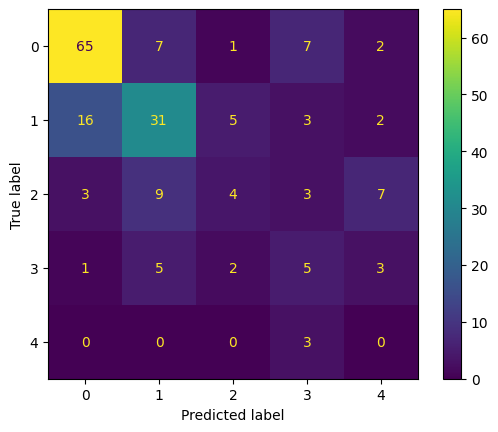

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nBayesModel.classes_)
disp.plot()

In [8]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = nBayesModel.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = knnModel.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()